In [1]:
# Grafo

from network.graphAlgorithm import barabasiAlbert
from nodes.pushsum import PushSumNode, MessageType, GossipType

FANOUT = 3
NONEWS = 10

graph = barabasiAlbert(32)
nodes = {}
distances = {}

for (src, dst) in graph.edges:
    distances[(src, dst)] = 10

for i in graph.nodes:
    nodes[i] = (PushSumNode(i, distances, 10, FANOUT, NONEWS))
    
print("Nodes: " + str(list(nodes.keys())))
print("Distances: " + str(distances))

Nodes: ['(0)', '(1)', '(2)', '(3)', '(4)', '(5)', '(6)', '(7)', '(8)', '(9)', '(10)', '(11)', '(12)', '(13)', '(14)', '(15)', '(16)', '(17)', '(18)', '(19)', '(20)', '(21)', '(22)', '(23)', '(24)', '(25)', '(26)', '(27)', '(28)', '(29)', '(30)', '(31)']
Distances: {('(0)', '(11)'): 10, ('(0)', '(8)'): 10, ('(0)', '(30)'): 10, ('(0)', '(27)'): 10, ('(0)', '(5)'): 10, ('(1)', '(10)'): 10, ('(2)', '(16)'): 10, ('(2)', '(13)'): 10, ('(2)', '(17)'): 10, ('(2)', '(18)'): 10, ('(2)', '(12)'): 10, ('(2)', '(24)'): 10, ('(2)', '(15)'): 10, ('(2)', '(5)'): 10, ('(2)', '(30)'): 10, ('(3)', '(8)'): 10, ('(4)', '(13)'): 10, ('(4)', '(24)'): 10, ('(4)', '(31)'): 10, ('(5)', '(21)'): 10, ('(5)', '(13)'): 10, ('(5)', '(24)'): 10, ('(5)', '(31)'): 10, ('(5)', '(30)'): 10, ('(5)', '(9)'): 10, ('(6)', '(25)'): 10, ('(7)', '(8)'): 10, ('(7)', '(30)'): 10, ('(7)', '(17)'): 10, ('(7)', '(10)'): 10, ('(8)', '(24)'): 10, ('(8)', '(10)'): 10, ('(8)', '(14)'): 10, ('(8)', '(31)'): 10, ('(8)', '(26)'): 10, ('(8)

In [2]:
# Simulador

from sim.faulty import FaultySimulator

faulty_sim = FaultySimulator(nodes, distances, 0.1, 100000)
events = faulty_sim.start((MessageType.GOSSIP, -1, (GossipType.REQUEST,0,0,0)), "(0)")

print("\nLenght of events: {}".format(len(events)))
print("")
for node in nodes.values():
    print(str(node.id) + ': \tsum: ' + "{:.5f}".format(node.sum) + ' \tweight: ' + "{:.5f}".format(node.weight) + ' \taggregate: ' + "{:.5f}".format(node.aggregate))


Lenght of events: 28716

(0): 	sum: 10.24458 	weight: 0.03201 	aggregate: 320.00000
(1): 	sum: 7.85436 	weight: 0.02454 	aggregate: 320.00000
(2): 	sum: 8.13753 	weight: 0.02543 	aggregate: 320.00000
(3): 	sum: 6.64086 	weight: 0.02075 	aggregate: 320.00000
(4): 	sum: 7.01895 	weight: 0.02193 	aggregate: 320.00000
(5): 	sum: 12.99436 	weight: 0.04061 	aggregate: 320.00000
(6): 	sum: 11.94915 	weight: 0.03734 	aggregate: 320.00000
(7): 	sum: 14.47080 	weight: 0.04522 	aggregate: 320.00000
(8): 	sum: 6.64086 	weight: 0.02075 	aggregate: 320.00000
(9): 	sum: 7.58846 	weight: 0.02371 	aggregate: 320.00000
(10): 	sum: 7.72056 	weight: 0.02413 	aggregate: 320.00000
(11): 	sum: 10.24458 	weight: 0.03201 	aggregate: 320.00000
(12): 	sum: 12.07554 	weight: 0.03774 	aggregate: 320.00000
(13): 	sum: 7.99755 	weight: 0.02499 	aggregate: 320.00000
(14): 	sum: 11.48100 	weight: 0.03588 	aggregate: 320.00000
(15): 	sum: 8.60521 	weight: 0.02689 	aggregate: 320.00000
(16): 	sum: 10.87056 	weight: 0.0

In [7]:
events += faulty_sim.proceed(1000)

print("\nLenght of events: {}".format(len(events)))

for node in nodes.values():
    print(str(node.id) + ': \tsum: ' + "{:.5f}".format(node.sum) + ' \tweight: ' + "{:.5f}".format(node.weight) + ' \taggregate: ' + "{:.5f}".format(node.aggregate))


Lenght of events: 148599
(0): 	sum: 6.82405 	weight: 0.00682 	aggregate: 1000.00000
(1): 	sum: 5.97559 	weight: 0.00598 	aggregate: 1000.00000
(2): 	sum: 11.81448 	weight: 0.01181 	aggregate: 1000.00000
(3): 	sum: 15.27040 	weight: 0.01527 	aggregate: 1000.00000
(4): 	sum: 14.25338 	weight: 0.01425 	aggregate: 1000.00000
(5): 	sum: 7.35573 	weight: 0.00736 	aggregate: 1000.00000
(6): 	sum: 6.42117 	weight: 0.00642 	aggregate: 1000.00000
(7): 	sum: 11.40924 	weight: 0.01141 	aggregate: 1000.00000
(8): 	sum: 12.98721 	weight: 0.01299 	aggregate: 1000.00000
(9): 	sum: 7.10199 	weight: 0.00710 	aggregate: 1000.00000
(10): 	sum: 9.64443 	weight: 0.00964 	aggregate: 1000.00000
(11): 	sum: 8.91093 	weight: 0.00891 	aggregate: 1000.00000
(12): 	sum: 14.24403 	weight: 0.01424 	aggregate: 1000.00000
(13): 	sum: 9.43551 	weight: 0.00944 	aggregate: 1000.00000
(14): 	sum: 16.60326 	weight: 0.01660 	aggregate: 1000.00000
(15): 	sum: 10.02914 	weight: 0.01003 	aggregate: 1000.00100
(16): 	sum: 14.4

In [3]:
# stats
message_count = 0

for event in events:
    if event[1][2][0] is MessageType.GOSSIP or event[1][2][0] is MessageType.RETRANSMISSION or event[1][2][0] is MessageType.ACK:
        message_count += 1

print("time: " + str(faulty_sim.current_instant) + " ms")
print("messages: " + str(message_count))

time: 3240.0 ms
messages: 28716


In [2]:
# Results & Points

from benchmark.resultsproducer import produce_results
from network.graphtype import GraphType
from benchmark.statisticsproducer import calculate_points

INITIAL_VALUE = 10
FANOUT = 3
NO_NEWS = 5
ERROR_PERCENTAGE = 0
TRIES = 10
VERTICES = 128

durations, messages = produce_results(GraphType.ERDOS_RENYI, INITIAL_VALUE, FANOUT, NO_NEWS, ERROR_PERCENTAGE, TRIES, VERTICES)
erdos = calculate_points(durations) + calculate_points(messages)
print(erdos)

durations, messages = produce_results(GraphType.BARABASI_ALBERT, INITIAL_VALUE, FANOUT, NO_NEWS, ERROR_PERCENTAGE, TRIES, VERTICES)
barabasi = calculate_points(durations) + calculate_points(messages)
print(barabasi)

durations, messages = produce_results(GraphType.WATTS_STROGATZ, INITIAL_VALUE, FANOUT, NO_NEWS, ERROR_PERCENTAGE, TRIES, VERTICES)
watts = calculate_points(durations) + calculate_points(messages)
print(watts)

([2, 4, 8, 16, 32, 64, 128], [130.0, 419.0, 769.0, 2235.0, 2201.0, 1721.0, 1440.0], [2, 4, 8, 16, 32, 64, 128], [37, 616.6, 3087.4, 18842.8, 37361.8, 62506, 108980.2])
([2, 4, 8, 16, 32, 64, 128], [130.0, 418.0, 850.0, 954.0, 1352.0, 770.0, 910.0], [2, 4, 8, 16, 32, 64, 128], [37, 602.2, 3624.4, 8789.2, 25251.4, 29965, 69655])
([2, 4, 8, 16, 32, 64, 128], [130.0, 250.0, 298.0, 361.0, 956.0, 3074.0, 5912.0], [2, 4, 8, 16, 32, 64, 128], [37, 717.4, 1703.8, 4085.2, 22603.6, 134516.8, 495046])


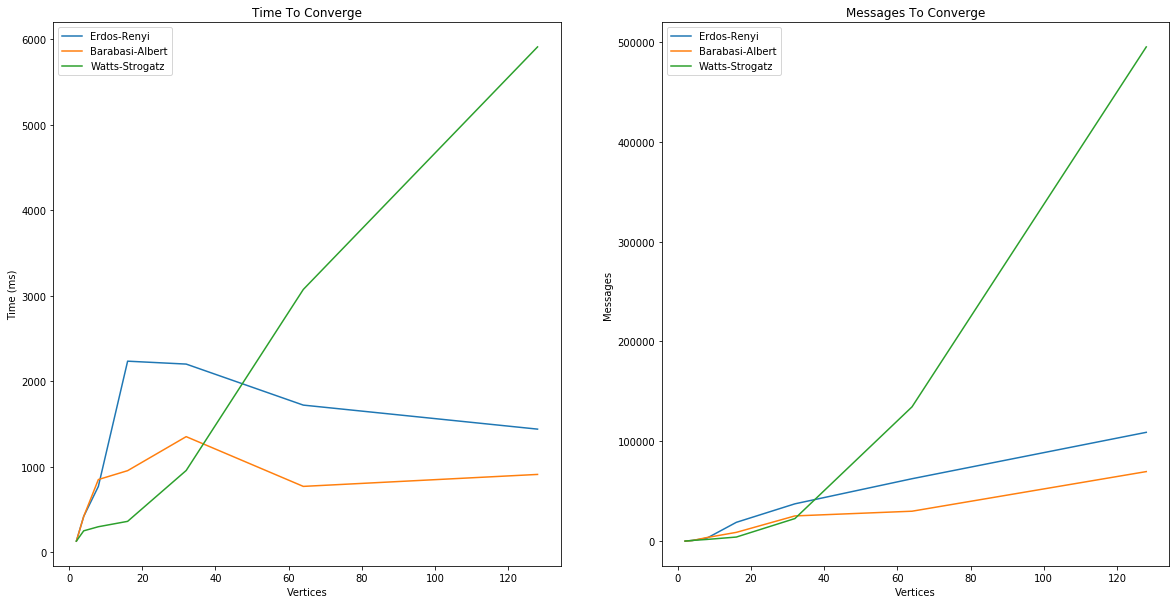

In [3]:
# Graphics

from benchmark.statisticsproducer import draw_plot

draw_plot(erdos, barabasi, watts)